## Deep Learning with Python

Let's put all the pieces together: Python, NumPy/pandas/Matplotlib, Linear Algebra and Neural Networks, and learn PyTorch. PyTorch is an open source library for Python easily used to train neural networks.



In [1]:
import torch.nn as nn
import inspect

# Using dir()
print("Using dir():")
print(dir(nn.Module))

# Using inspect.getmembers()
print("\nUsing inspect.getmembers():")
methods = inspect.getmembers(nn.Module, predicate=inspect.isfunction)
for method in methods:
    print(method[0])

# Using help()
print("\nUsing help():")



Using dir():
['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_call_impl', '_compiled_call_impl', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_name', '_load_from_state_dict', '_maybe_warn_non_full_backward_hook', '_named_members', '_register_load_state_dict_pre_hook', '_register_state_dict_hook', '_replicate_for_data_parallel', '_save_to_state_dict', '_slow_forward', '_version', '_wrapped_call_impl', 'add_module', 'apply', 'bfloat16', 'buffers', 'call_super_init', 'children', 'compile', 'cpu', 'cuda', 'double', 'dump_patches', 'eval', 'extra_repr', 'float', 'forward', 'get_buffer'

## Tensors 

The fundamental data structure of the pytorch is `Tensor`, Our neural networks are just the linear algebra computations on these tensors.

- vector is a one dimensional tensor
- a matrix is a 2 - dimensional tensor
- an array with 3 indices is a 3 dimensional tensor (Example RGB images) 

In [2]:
import numpy as np
import torch 

In [3]:
x = torch.rand(3, 2)
x

tensor([[0.3224, 0.3212],
        [0.5791, 0.4230],
        [0.2884, 0.3317]])

In [4]:
x.size()

torch.Size([3, 2])

In [5]:
y = torch.ones(x.size()) # it will calculate the size of x and pass it to the y
y

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [6]:
z = x + y

z

tensor([[1.3224, 1.3212],
        [1.5791, 1.4230],
        [1.2884, 1.3317]])

In [7]:
z[0] # Get the first row

tensor([1.3224, 1.3212])

In [8]:
z[:, 1:] # All the rows for the 2nd column 

tensor([[1.3212],
        [1.4230],
        [1.3317]])

In [9]:
z[:, :1] # All the rows for the 1st column 

tensor([[1.3224],
        [1.5791],
        [1.2884]])

In [10]:
z.add(1) # It will change the z value temparaly means not inplace

tensor([[2.3224, 2.3212],
        [2.5791, 2.4230],
        [2.2884, 2.3317]])

In [11]:
z # The value did not change as you can see here 

tensor([[1.3224, 1.3212],
        [1.5791, 1.4230],
        [1.2884, 1.3317]])

In [12]:
z.add_(1) # It will 

tensor([[2.3224, 2.3212],
        [2.5791, 2.4230],
        [2.2884, 2.3317]])

In [13]:
z # Tha value chnaged completly

tensor([[2.3224, 2.3212],
        [2.5791, 2.4230],
        [2.2884, 2.3317]])

## Reshaping

Reshaping the tensors is usually common operation. First to get the size of tensor use `.size()`. Then reshape a tensor using `.resize()` or `.resize_()` notice the underscore, reshaping an in-place operation

In [14]:
z1 = z.resize(2, 3)
z1

/Users/mekalathuruchenchaiah/Desktop/PROGRAMMING/Projects/GPU-pytorch/env/lib/python3.8/site-packages/torch/_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


tensor([[2.3224, 2.3212, 2.5791],
        [2.4230, 2.2884, 2.3317]])

In [15]:
z # Not chnaged permaneltly 

tensor([[2.3224, 2.3212],
        [2.5791, 2.4230],
        [2.2884, 2.3317]])

In [16]:
z.resize_(3, 2)

tensor([[2.3224, 2.3212],
        [2.5791, 2.4230],
        [2.2884, 2.3317]])

In [17]:
z # Now changed permanently

tensor([[2.3224, 2.3212],
        [2.5791, 2.4230],
        [2.2884, 2.3317]])

## Numpy to Torch and back

Converting between Numpy arrays and Torch tensors is super simple and useful. To create a tensor from a Numpy array, use torch `.from _numpy()` . To convert a tensor to a Numpy array, use the `.numpy()` method.

In [18]:
a = np.random.rand(3, 4)
a

array([[0.84304397, 0.01880894, 0.75219276, 0.86340428],
       [0.67934247, 0.10004579, 0.86316134, 0.01853742],
       [0.66781168, 0.80783505, 0.72559143, 0.35045998]])

In [19]:
b = torch.from_numpy(a) # Changes the array to tensor 
b 

tensor([[0.8430, 0.0188, 0.7522, 0.8634],
        [0.6793, 0.1000, 0.8632, 0.0185],
        [0.6678, 0.8078, 0.7256, 0.3505]], dtype=torch.float64)

In [20]:
b.numpy() # Will change the tensor to numpy array

array([[0.84304397, 0.01880894, 0.75219276, 0.86340428],
       [0.67934247, 0.10004579, 0.86316134, 0.01853742],
       [0.66781168, 0.80783505, 0.72559143, 0.35045998]])

## Defining Networks

Let's see how to build neural networks using the pytorch 



In [21]:
import numpy as np
import torch 

import helper 

import matplotlib.pyplot as plt 
from torchvision import datasets, transforms

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

The dataset we used for this example is `MNIST`. This dataset contains the bunch of handdrawn digits from 0 through 9 which is used to classify the images into digits. Here we are using the `torchvision` to download and load the training data.

In [22]:
# Define the transform to normalize the grayscale data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # For grayscale images
])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Fetch a batch of images and labels
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)  # Should output something like [64, 1, 28, 28] for a batch of 64 grayscale images


torch.Size([64, 1, 28, 28])


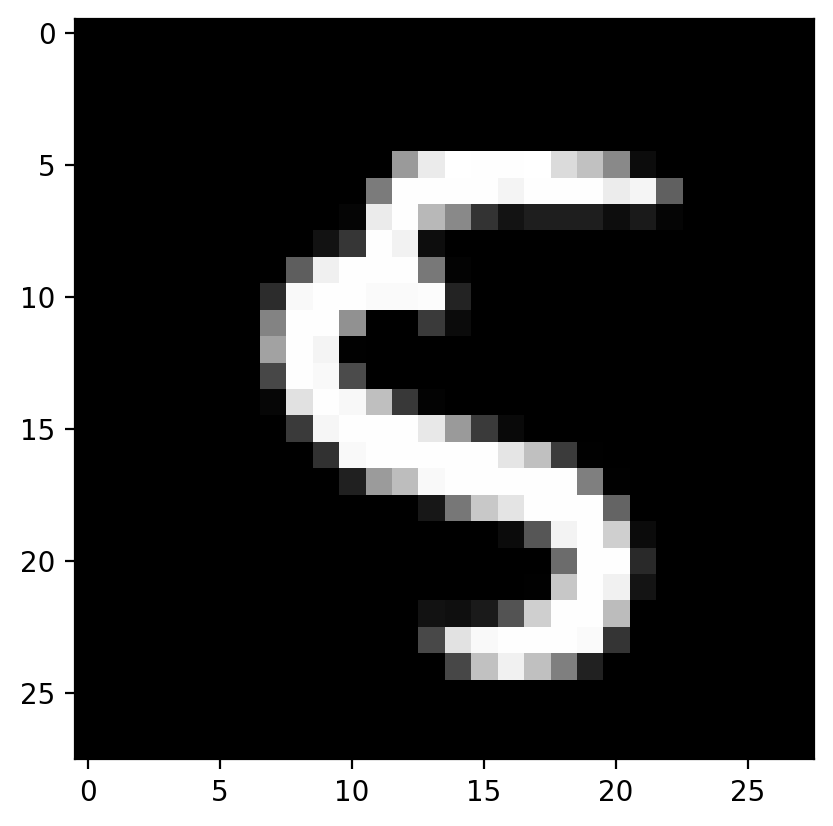

In [23]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

## Building networks with PyTorch

Here I'll use PyTorch to build a simple feedfoward network to classify the MNIST images. That is, the network will receive a digit image as input and predict the digit in the image.

<img src="assets/mlp_mnist.png" width=600px>

To build a neural network with PyTorch, you use the `torch.nn` module. The network itself is a class inheriting from `torch.nn.Module`. You define each of the operations separately, like `nn.Linear(784, 128)` for a fully connected linear layer with 784 inputs and 128 units.

The class needs to include a `forward` method that implements the forward pass through the network. In this method, you pass some input tensor `x` through each of the operations you defined earlier. The `torch.nn` module also has functional equivalents for things like ReLUs in `torch.nn.functional`. This module is usually imported as `F`. Then to use a ReLU activation on some layer (which is just a tensor), you'd do `F.relu(x)`. Below are a few different commonly used activation functions.

<img src="assets/activation.png" width=700px>

So, for this network, I'll build it with three fully connected layers, then a softmax output for predicting classes. The softmax function is similar to the sigmoid in that it squashes inputs between 0 and 1, but it's also normalized so that all the values sum to one like a proper probability distribution.

In [24]:
import torch
from torch import nn # Neural Network Functions
import torch.nn.functional as F

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()  # Initialize the parent class (nn.Module)
        
        # Define the fully connected layers
        self.fc1 = nn.Linear(784, 128)  # Input size: 784 (28x28 image flattened), Output: 128 neurons
        self.fc2 = nn.Linear(128, 64)   # Input: 128, Output: 64 neurons
        self.fc3 = nn.Linear(64, 10)    # Input: 64, Output: 10 neurons (for 10 classes)

    # Forward pass
    def forward(self, x):
        x = self.fc1(x)           # Pass through first fully connected layer
        x = F.relu(x)             # Apply ReLU activation function
        x = self.fc2(x)           # Pass through second fully connected layer
        x = F.relu(x)             # Apply ReLU activation function
        x = self.fc3(x)           # Pass through third fully connected layer
        x = F.softmax(x, dim=1)   # Apply softmax to output (across the class dimension)
        return x

# Instantiate the model
model = Network()
print(model)


Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [26]:
# Weights and bias will be automatically created for us 

print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0044,  0.0013,  0.0068,  ..., -0.0061, -0.0191, -0.0350],
        [-0.0332,  0.0304,  0.0099,  ..., -0.0180, -0.0133,  0.0073],
        [ 0.0275, -0.0037, -0.0236,  ...,  0.0307,  0.0225,  0.0195],
        ...,
        [-0.0325, -0.0287,  0.0178,  ..., -0.0284, -0.0038, -0.0063],
        [ 0.0026,  0.0272, -0.0189,  ...,  0.0092, -0.0083,  0.0156],
        [ 0.0357, -0.0148,  0.0276,  ..., -0.0180,  0.0304,  0.0301]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0187,  0.0041,  0.0092, -0.0296, -0.0315,  0.0212,  0.0314, -0.0300,
         0.0030,  0.0178,  0.0211, -0.0244,  0.0166, -0.0129, -0.0199,  0.0013,
         0.0117,  0.0091,  0.0179,  0.0095, -0.0110, -0.0015, -0.0270, -0.0208,
         0.0319,  0.0132,  0.0113, -0.0263,  0.0067,  0.0311, -0.0312, -0.0096,
         0.0271,  0.0320,  0.0339, -0.0210,  0.0162,  0.0102, -0.0111, -0.0294,
        -0.0297, -0.0130,  0.0126,  0.0038,  0.0353,  0.0183, -0.0126,  0.0088,
        -0.0032

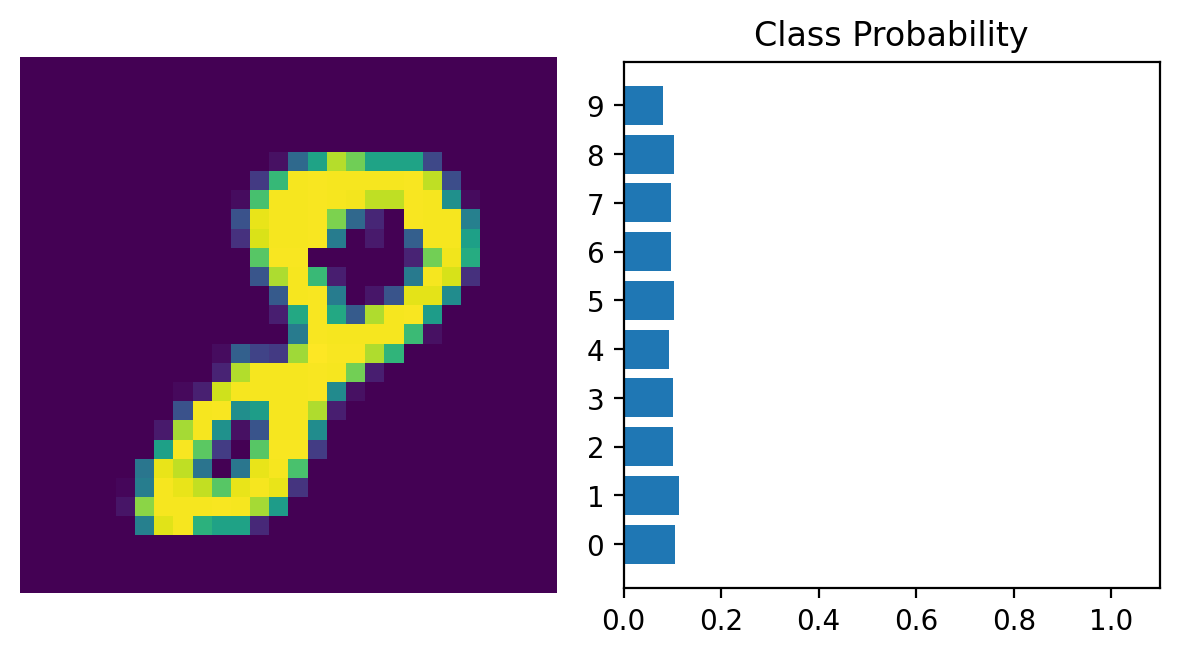

In [27]:
images, labels = next(iter(trainloader)) 
# This loads a batch of images and their corresponding labels from the trainloader. The images are in the shape [64, 1, 28, 28], representing a batch of 64 images,
# each 28x28 pixels in size, and with 1 color channel (grayscale).

images.resize_(64, 1, 784)
images.resize_(images.shape[0], 1, 784)

ps = model.forward(images[0])

helper.view_classify(images[0].view(1, 28, 28), ps)

pytorch provides more convenient way of building a models using `nn.Sequential`

In [32]:
import torch.nn as nn

# Define the input size, hidden layers, and output size
input_size = 784  # 28x28 images flattened to a 1D vector
hidden_size = [128, 64]  # Two hidden layers with 128 and 64 neurons
output_size = 10  # For 10 classes (e.g., digits 0-9 for MNIST)

# Create the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(input_size, hidden_size[0]),  # Input layer to first hidden layer
    nn.ReLU(),  # Correct ReLU activation function
    nn.Linear(hidden_size[0], hidden_size[1]),  # First hidden layer to second hidden layer
    nn.ReLU(),  # Correct ReLU activation function
    nn.Linear(hidden_size[1], output_size),  # Second hidden layer to output layer
    nn.Softmax(dim=1)  # Softmax activation for the output layer
)

# Print the model architecture
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


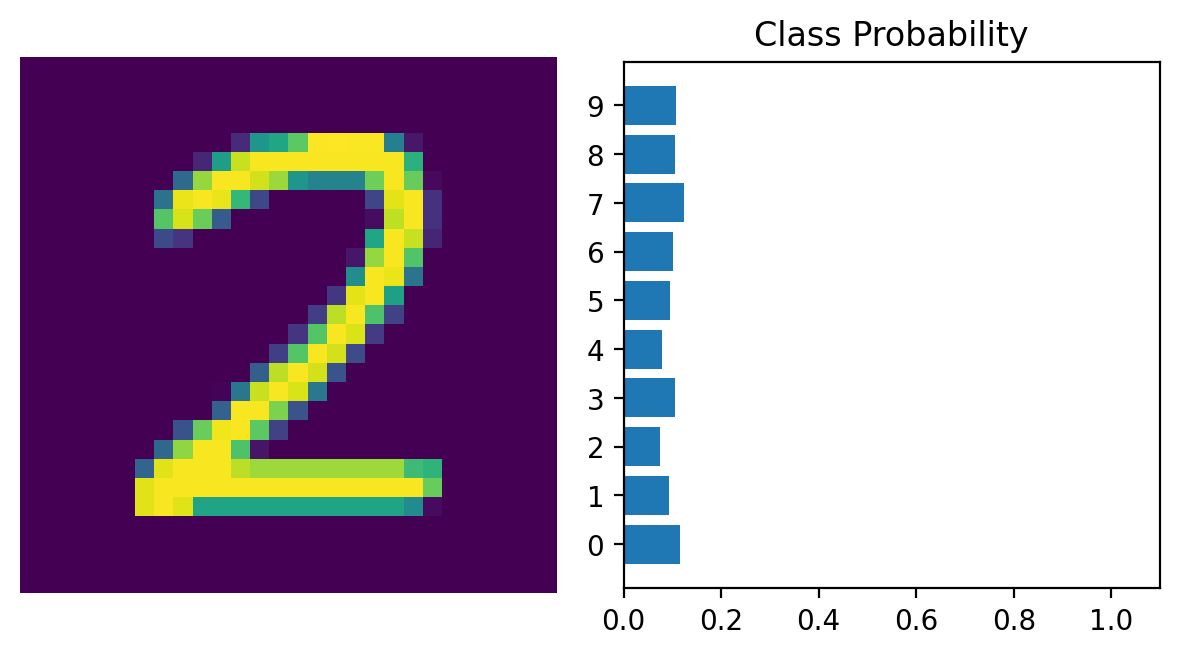

In [33]:
images, labels = next(iter(trainloader)) 
# This loads a batch of images and their corresponding labels from the trainloader. The images are in the shape [64, 1, 28, 28], representing a batch of 64 images,
# each 28x28 pixels in size, and with 1 color channel (grayscale).

images.resize_(64, 1, 784)
images.resize_(images.shape[0], 1, 784)

ps = model.forward(images[0])

helper.view_classify(images[0].view(1, 28, 28), ps)

You can also pass in an `OrderedDict` to name the individual layers and operations. Note that a dictionary keys must be unique, so _each operation must have a different name_.

In [39]:
from collections import OrderedDict

# Define the input size, hidden layers, and output size
input_size = 784  # 28x28 images flattened to a 1D vector
hidden_size = [128, 64]  # Two hidden layers with 128 and 64 neurons
output_size = 10  # For 10 classes (e.g., digits 0-9 for MNIST) 


model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_size[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_size[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Now it's your turn to build a simple network, use any method I've covered so far. In the next notebook, you'll learn how to train a network so it can make good predictions.

>**Exercise:** Build a network to classify the MNIST images with _three_ hidden layers. Use 400 units in the first hidden layer, 200 units in the second layer, and 100 units in the third layer. Each hidden layer should have a ReLU activation function, and use softmax on the output layer. 

In [42]:
from collections import OrderedDict

input_size = 784
hidden_size = [400, 200, 100]
output_size = 10

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu', nn.ReLU()),
    ('fc3', nn.Linear(hidden_size[1], hidden_size[2])),
    ('relu', nn.ReLU()),
    ('output', nn.Linear(hidden_size[2], output_size)),
    ('softmax', nn.Softmax(dim=1))
]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

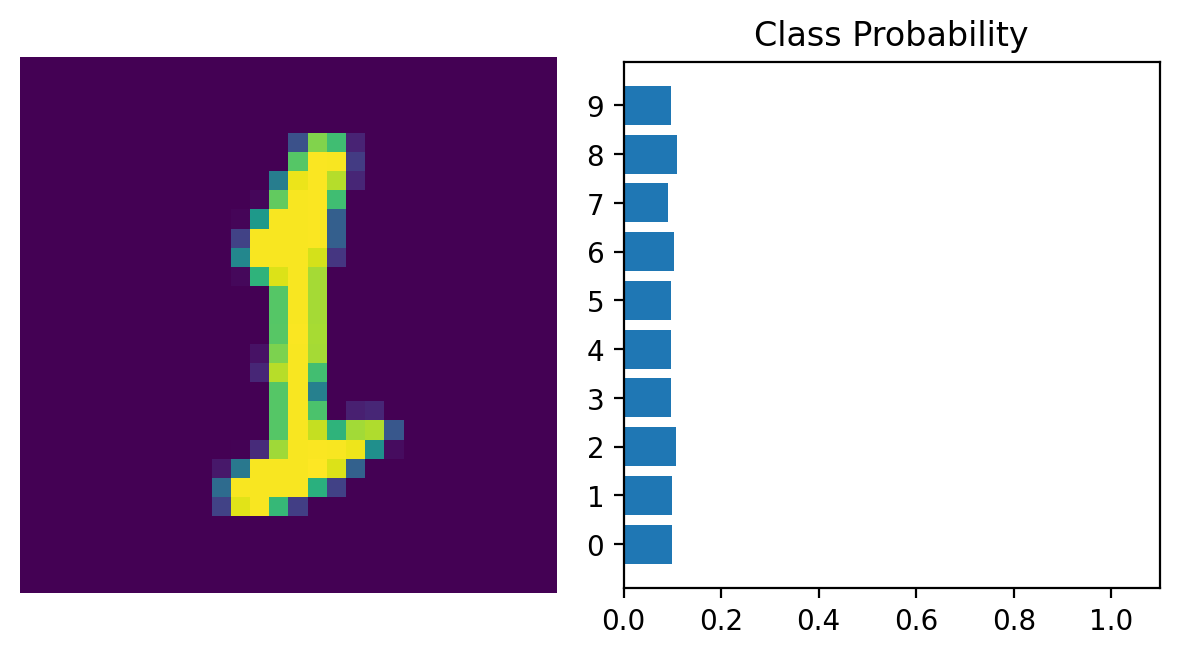

In [43]:
## Run this cell with your model to make sure it works ##
# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

# Training Neural Networks

# Training Neural Networks

The network we built in the previous part isn't so smart, it doesn't know anything about our handwritten digits. Neural networks with non-linear activations work like universal function approximators. There is some function that maps your input to the output. For example, images of handwritten digits to class probabilities. The power of neural networks is that we can train them to approximate this function, and basically any function given enough data and compute time.

<img src="assets/function_approx.png" width=500px>

At first the network is naive, it doesn't know the function mapping the inputs to the outputs. We train the network by showing it examples of real data, then adjusting the network parameters such that it approximates this function.

To find these parameters, we need to know how poorly the network is predicting the real outputs. For this we calculate a **loss function** (also called the cost), a measure of our prediction error. For example, the mean squared loss is often used in regression and binary classification problems

$$
\ell = \frac{1}{2n}\sum_i^n{\left(y_i - \hat{y}_i\right)^2}
$$

where $n$ is the number of training examples, $y_i$ are the true labels, and $\hat{y}_i$ are the predicted labels.

By minimizing this loss with respect to the network parameters, we can find configurations where the loss is at a minimum and the network is able to predict the correct labels with high accuracy. We find this minimum using a process called **gradient descent**. The gradient is the slope of the loss function and points in the direction of fastest change. To get to the minimum in the least amount of time, we then want to follow the gradient (downwards). You can think of this like descending a mountain by following the steepest slope to the base.

<img src='assets/gradient_descent.png' width=350px>

## Backpropagation

For single layer networks, gradient descent is simple to implement. However, it's more complicated for deeper, multilayer neural networks like the one we've built. Complicated enough that it took about 30 years before researchers figured out how to train multilayer networks, although it's straightforward once you learn about it. 

This is done through **backpropagation** which is really just an application of the chain rule from calculus. It's easiest to understand if we convert a two layer network into a graph representation.

<img src='assets/w1_backprop_graph.png' width=400px>

In the forward pass through the network, our data and operations go from right to left here. To train the weights with gradient descent, we propagate the gradient of the cost backwards through the network. Mathematically, this is really just calculating the gradient of the loss with respect to the weights using the chain rule.

$$
\frac{\partial \ell}{\partial w_1} = \frac{\partial l_1}{\partial w_1} \frac{\partial s}{\partial l_1} \frac{\partial l_2}{\partial s} \frac{\partial \ell}{\partial l_2}
$$

We update our weights using this gradient with some learning rate $\alpha$. 

$$
w^\prime = w - \alpha \frac{\partial \ell}{\partial w}
$$

The learning rate is set such that the weight update steps are small enough that the iterative method settles in a minimum.

The first thing we need to do for training is define our loss function. In PyTorch, you'll usually see this as `criterion`. Here we're using softmax output, so we want to use `criterion = nn.CrossEntropyLoss()` as our loss. Later when training, you use `loss = criterion(output, targets)` to calculate the actual loss.

We also need to define the optimizer we're using, SGD or Adam, or something along those lines. Here I'll just use SGD with `torch.optim.SGD`, passing in the network parameters and the learning rate.

## Autograd

Torch provides a module, `autograd`, for automatically calculating the gradient of tensors. It does this by keeping track of operations performed on tensors. To make sure PyTorch keeps track of operations on a tensor and calculates the gradients, you need to set `requires_grad` on a tensor. You can do this at creation with the `requires_grad` keyword, or at any time with `x.requires_grad_(True)`.

You can turn off gradients for a block of code with the `torch.no_grad()` content:
```python
x = torch.zeros(1, requires_grad=True)
>>> with torch.no_grad():
...     y = x * 2
>>> y.requires_grad
False
```

Also, you can turn on or off gradients altogether with `torch.set_grad_enabled(True|False)`.

The gradients are computed with respect to some variable `z` with `z.backward()`. This does a backward pass through the operations that created `z`.

In [ ]:
%matplotlib inline 

%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict 

